In [1]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import LabelEncoder



In [2]:
def load_csv_data(file_path: str):
    """
    This function loads CSV (comma separated values) 
    data using the pandas library.

    ARGUMENTS
    ---------
        file_path (str):
            The `.csv` file destination path. 

    RETURNS
    -------
        Pandas `DataFrame` object containing all the data.
    """
    return pd.read_csv(file_path)

In [31]:
dataset=load_csv_data('concrete_data.csv')

In [4]:
dataset


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
dataset.shape


(1030, 9)

In [6]:
import seaborn as sns



In [7]:
plt.suptitle("Pairplot",fontsize=18)
plt.tight_layout(pad=1)

<Figure size 432x288 with 0 Axes>

NameError: name 'save_fig' is not defined

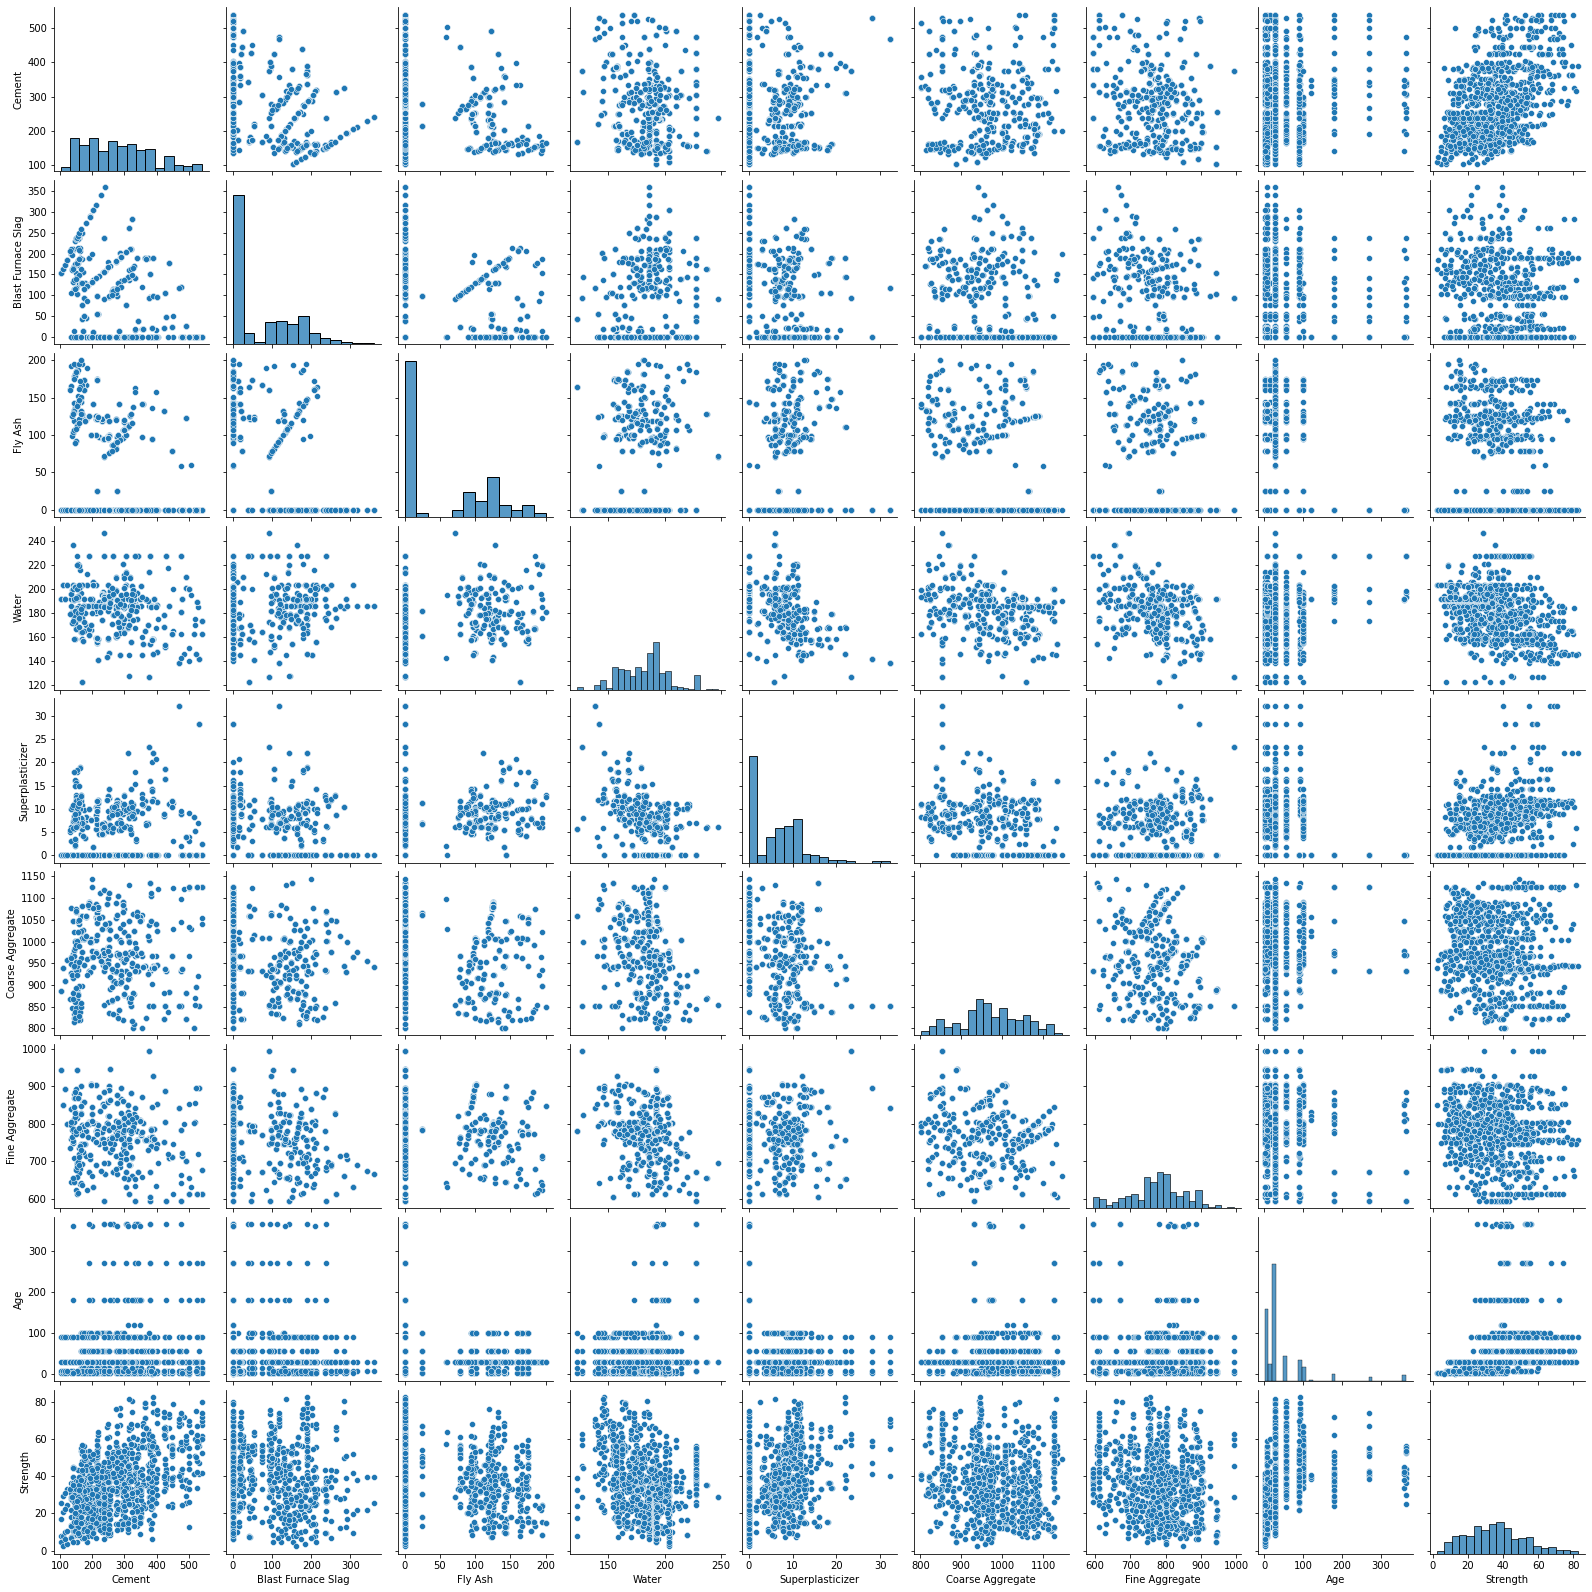

In [9]:
sns.pairplot(dataset, palette="rocket")
save_fig("pairplot_before")

In [10]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    This function saves the matplotlib figures.
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

NameError: name 'IMAGES_PATH' is not defined

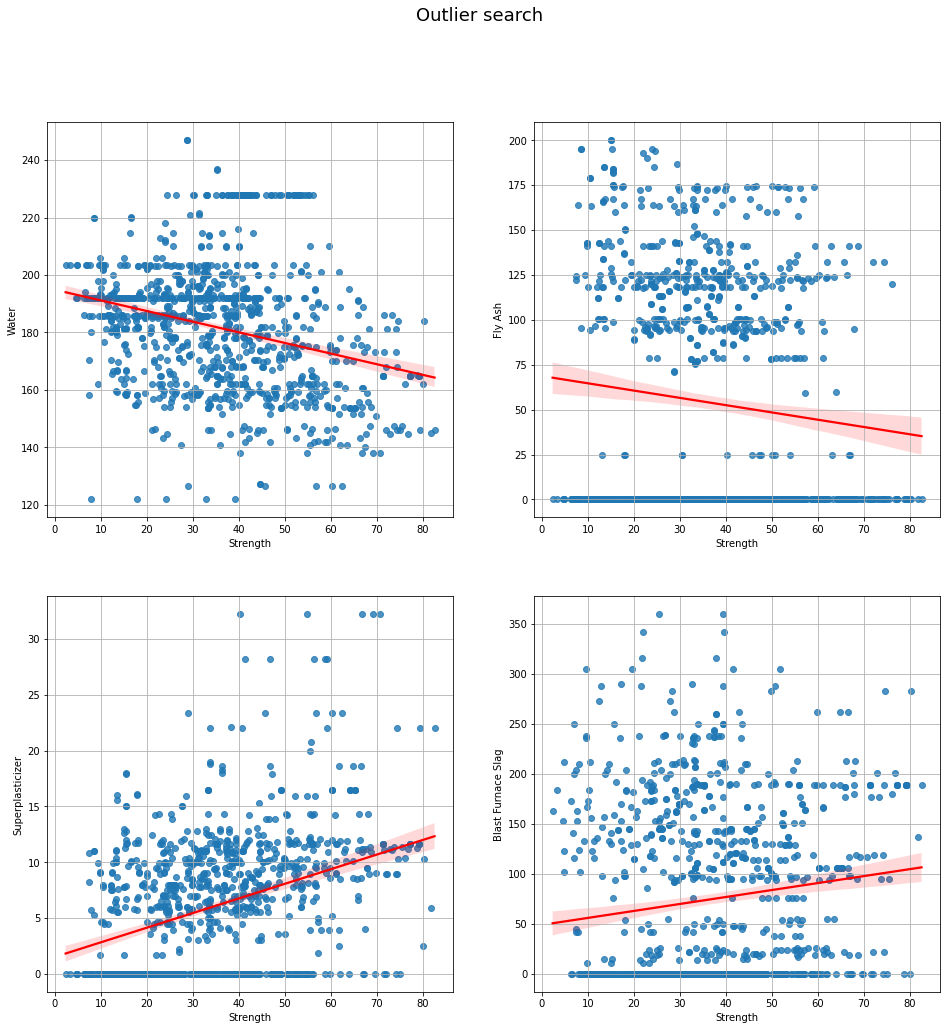

In [11]:
plt.figure(figsize=(16,16))
plt.suptitle("Outlier search",fontsize=18)
plt.tight_layout(pad=1)

plt.subplot(2, 2, 1)
sns.regplot(x="Strength", y="Water", data=dataset, line_kws={"color": "red"})
plt.grid()
plt.subplot(2, 2, 2)
sns.regplot(x="Strength", y="Fly Ash", data=dataset, line_kws={"color": "red"})
plt.grid()
plt.subplot(2, 2, 3)
sns.regplot(x="Strength", y="Superplasticizer", data=dataset, line_kws={"color": "red"})
plt.grid()
plt.subplot(2, 2, 4)
sns.regplot(x="Strength", y="Blast Furnace Slag", data=dataset, line_kws={"color": "red"})
plt.grid()

save_fig("outliers_example")

In [29]:
dataset = dataset[(dataset["Water"] < 170)]
dataset = dataset[(dataset["Fly Ash"] > 125)]
dataset = dataset[(dataset["Superplasticizer"] < 8)]
dataset = dataset[(dataset["Blast Furnace Slag"] > 75)]
dataset.shape

(5, 9)

In [14]:
dataset


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
69,485.0,0.0,0.0,146.0,0.0,1120.0,800.0,28,71.99
379,500.0,0.0,0.0,140.0,4.0,966.0,853.0,28,67.57
827,522.0,0.0,0.0,146.0,0.0,896.0,896.0,7,50.51
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28,74.99


In [30]:
del dataset

In [26]:
dataset.shape

(5, 9)

In [19]:
dataset = dataset[(dataset["Water"] < 170)]

In [21]:
dataset = dataset[(dataset["Fly Ash"] > 125)]

In [23]:
dataset = dataset[(dataset["Superplasticizer"] < 8)]

In [25]:
dataset = dataset[(dataset["Blast Furnace Slag"] > 75)]

In [32]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
X=dataset.drop(["Strength"],axis=1)
y=dataset["Strength"]

In [35]:
import sklearn
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.linear_model import LinearRegression
modellin = linear_model.LinearRegression()
modellin.fit(X_train, y_train)

LinearRegression()

In [37]:
modellin.coef_

array([ 0.11788527,  0.0994836 ,  0.08342198, -0.18119511,  0.245444  ,
        0.01234815,  0.01409134,  0.10960742])

In [38]:
modellin.intercept_

-5.836550574111108

In [39]:
y_pred = modellin.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.996776260252587
Mean Squared Error: 97.81937192160288
Root Mean Squared Error: 9.890367633288607
